In [70]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')




In [71]:
xls = pd.ExcelFile('data/ultamerge4_date_adjusted.xlsx')
hypermerge = pd.read_excel(xls)

In [76]:
xls2 = pd.ExcelFile('data/arrival.xlsx')
arrival = pd.read_excel(xls2)


In [90]:
xls3 = pd.ExcelFile('data/arrival_readyscan.xlsx')
arr_rdy = pd.read_excel(xls3)

In [91]:
xls4 = pd.ExcelFile('data/ready_to_ship.xlsx')
ready = pd.read_excel(xls4)

In [78]:
hypermerge.head()

,order_id,order_date,processing,customer_id,customer_name_x,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,processing_unt_shp,processing_unt_arrival,order_weekday,COGS,order_to_pickup,order_day,date_1,ready_to_ship_approx,idle_time_approx
0,CA-2019-121755,2019-01-16,standard_processing,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,NaT,NaT,NaT,2019-01-23,7.0,NaN,2,78.7959,7.0,Wednesday,2019-01-18,2019-01-18,5.0
1,CA-2019-121755,2019-01-16,standard_processing,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049,West,Power Muesli,Super Fibre Boost,OFF-BI-10001634,11.648,2,0.2,4.2224,NaT,NaT,NaT,2019-01-23,7.0,NaN,2,7.4256,7.0,Wednesday,2019-01-18,2019-01-18,5.0
2,CA-2019-118255,2019-03-11,express_processing,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,NaT,NaT,NaT,2019-03-13,2.0,NaN,0,26.2086,2.0,Monday,2019-03-13,2019-03-13,0.0
3,CA-2019-118255,2019-03-11,express_processing,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122,Central,Power Muesli,Super Fibre Boost,OFF-BI-10003291,17.460,2,0.0,8.2062,NaT,NaT,NaT,2019-03-13,2.0,NaN,0,9.2538,2.0,Monday,2019-03-13,2019-03-13,0.0
4,CA-2019-169194,2019-06-20,standard_processing,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,NaT,NaT,NaT,2019-06-26,6.0,NaN,3,40.0500,6.0,Thursday,2019-06-22,2019-06-22,4.0


In [67]:
##order_to_pickup/processing to pickupscan
# time from orderdate to pickupcscan 
#mean = 6.1 Days
#mode = 7 Days
#std = 2.5 Days
#50% qurt = median = 7
#75% qantile = 8 days 
hypermerge['processing_unt_shp'].describe()

count    5892.000000
mean        6.117787
std         2.510012
min         0.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        12.000000
Name: processing_unt_shp, dtype: float64

In [84]:
hypermerge['processing_unt_shp'].mode()

0    7.0
Name: processing_unt_shp, dtype: float64

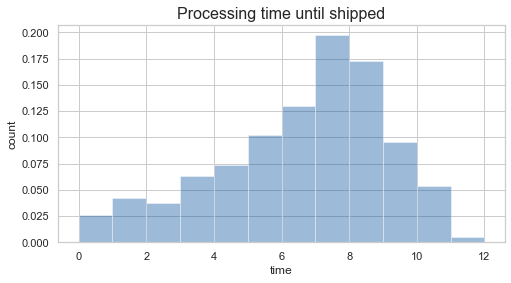

In [65]:
plt.figure(figsize=(8,4))
sns.distplot(hypermerge['processing_unt_shp'], bins=12, kde=False,  hist=True,)
plt.title('Processing time until shipped', size=16)
plt.ylabel('count')
plt.xlabel('time');

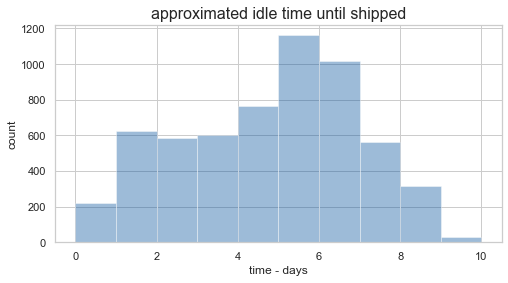

In [83]:
# idle time from ready to ship to picked up by truck (approximated )
# -1/-2 cal errors corrected
#mean = 4.3 Days
#std = 2.2 Days
#50% qurt = median = 5 Days
#75% qantile = 6 days 
plt.figure(figsize=(8,4))
sns.distplot(hypermerge['idle_time_approx'],bins=10, kde=False,  hist=True)
plt.title('approximated idle time until shipped', size=16)
plt.ylabel('count')
plt.xlabel('time - days');

In [79]:
hypermerge['idle_time_approx'].describe()

count    5892.000000
mean        4.305160
std         2.172939
min         0.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        10.000000
Name: idle_time_approx, dtype: float64

In [ ]:
#subset filtered by ready_to_ship_date, 418 rows
ready.head()

In [96]:
ready['real_processing_time'] = ready['ready_to_ship_date']-ready['order_date']

In [110]:
ready['delay_to_ship'] = ready['on_truck_scan_date']-ready['ready_to_ship_date']

In [ ]:
ready.head()

In [ ]:
# measured processing time from order date to ready_to_ship_date
#mode 5 days
#mean = 4 days
#std = 1 day
#50% qurt = median = 5 days
#75% qantile = 6 days 

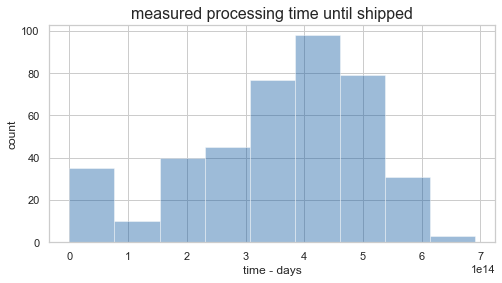

In [106]:
plt.figure(figsize=(8,4))
sns.distplot(ready['real_processing_time'],bins=9, kde=False,  hist=True)
plt.title('measured processing time until shipped', size=16)
plt.ylabel('count')
plt.xlabel('time - days');

In [98]:
ready['real_processing_time'].mode()

0   5 days
Name: real_processing_time, dtype: timedelta64[ns]

In [99]:
ready['real_processing_time'].describe()

count                          418
mean     4 days 03:47:22.105263157
std      1 days 22:47:56.623622708
min                0 days 00:00:00
25%                3 days 00:00:00
50%                5 days 00:00:00
75%                6 days 00:00:00
max                8 days 00:00:00
Name: real_processing_time, dtype: object

In [ ]:
#measured delay, due to waiting on pickup to ship
#mode = 2 days
#mean = 1.64 day
#std = 0.95 days
#50% qurt = median =2 days
#75% qantile = 2 days

In [111]:
ready['delay_to_ship'].describe()

count                          418
mean     1 days 15:26:41.913875598
std      0 days 23:12:24.026769113
min                0 days 00:00:00
25%                1 days 00:00:00
50%                2 days 00:00:00
75%                2 days 00:00:00
max                3 days 00:00:00
Name: delay_to_ship, dtype: object

In [112]:
ready['delay_to_ship'].mode()

0   2 days
Name: delay_to_ship, dtype: timedelta64[ns]

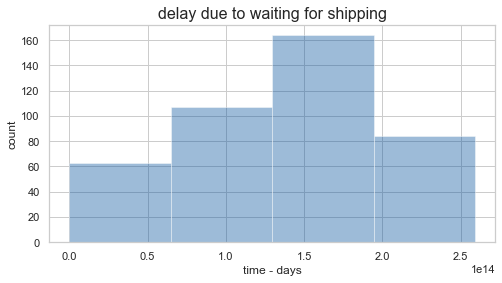

In [118]:
plt.figure(figsize=(8,4))
sns.distplot(ready['delay_to_ship'],bins=4, kde=False,  hist=True)
plt.title('delay due to waiting for shipping', size=16)
plt.ylabel('count')
plt.xlabel('time - days');

In [154]:
with pd.ExcelWriter("data/ready2.xlsx") as writer:
    ready.to_excel(writer) 

In [ ]:
#subset df with 668 rows, all rows have a value for arrive_scan_date
#arrival.info()
arrival.head()

In [119]:
arrival['real_delivery_time'] = arrival['arrival_scan_date']-arrival['on_truck_scan_date']

In [120]:
#measured delivery time,  arrival scan by customer - on_truck_scan_date
#mode 5 days
#mean 4.56 days
#std 1.2 days
#50% qurt = median = 5 days
#75% 5 days
arrival['real_delivery_time'].mode()

0   5 days
Name: real_delivery_time, dtype: timedelta64[ns]

In [121]:
arrival['real_delivery_time'].describe()

count                          668
mean     4 days 13:28:22.994011976
std      1 days 05:00:33.077887896
min                1 days 00:00:00
25%                4 days 00:00:00
50%                5 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
Name: real_delivery_time, dtype: object

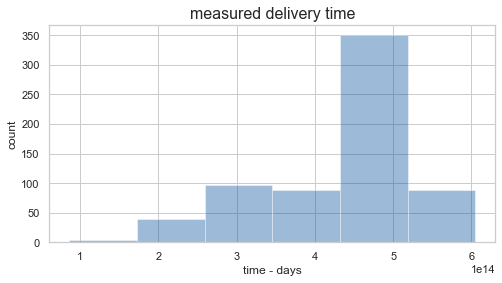

In [125]:
plt.figure(figsize=(8,4))
sns.distplot(arrival['real_delivery_time'],bins=6, kde=False,  hist=True)
plt.title('measured delivery time', size=16)
plt.ylabel('count')
plt.xlabel('time - days');

In [126]:
arrival.head()

,order_id,order_date,processing,customer_id,customer_name_x,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,processing_unt_shp,processing_unt_arrival,order_weekday,COGS,order_to_pickup,order_day,date_1,ready_to_ship_approx,idle_time_approx,real_delivery_time
0,CA-2019-145625,2019-09-11,standard_processing,KC-16540,Kelly Collister,Email,United States,San Diego,California,92037,West,Special Projects Muesil,Gluten Free,TEC-AC-10003832,3347.37,13,0.0,636.0003,2019-09-23,2019-09-17,2019-09-18,2019-09-18,7,12,2,2711.3697,7,Wednesday,2019-09-13,2019-09-13,5,5 days
1,CA-2019-145625,2019-09-11,standard_processing,KC-16540,Kelly Collister,Email,United States,San Diego,California,92037,West,Power Muesli,Nuts and more,OFF-PA-10004569,7.61,1,0.0,3.5767,2019-09-23,2019-09-17,2019-09-18,2019-09-18,7,12,2,4.0333,7,Wednesday,2019-09-13,2019-09-13,5,5 days
2,CA-2019-162138,2019-04-23,standard_processing,GK-14620,Grace Kelly,Sales,United States,Hesperia,California,92345,West,Special Projects Muesil,Gluten Free,TEC-AC-10001908,99.99,1,0.0,34.9965,2019-05-06,NaT,NaT,2019-05-01,8,13,1,64.9935,8,Tuesday,2019-04-25,2019-04-25,6,5 days
3,CA-2019-162138,2019-04-23,standard_processing,GK-14620,Grace Kelly,Sales,United States,Hesperia,California,92345,West,Power Muesli,Super Fibre Boost,OFF-BI-10004593,251.52,6,0.2,81.7440,2019-05-06,NaT,NaT,2019-05-01,8,13,1,169.7760,8,Tuesday,2019-04-25,2019-04-25,6,5 days
4,CA-2019-169166,2019-05-09,standard_processing,SS-20590,Sonia Sunley,Email,United States,Seattle,Washington,98115,West,Special Projects Muesil,Gluten Free,TEC-AC-10000991,93.98,2,0.0,13.1572,2019-05-20,NaT,NaT,2019-05-15,6,11,3,80.8228,6,Thursday,2019-05-11,2019-05-11,4,5 days


In [146]:
arrival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   order_id                668 non-null    object         
 1   order_date              668 non-null    datetime64[ns] 
 2   processing              668 non-null    object         
 3   customer_id             668 non-null    object         
 4   customer_name_x         668 non-null    object         
 5   origin_channel          668 non-null    object         
 6   country/region          668 non-null    object         
 7   city                    668 non-null    object         
 8   state                   668 non-null    object         
 9   postal_code             668 non-null    int64          
 10  region                  668 non-null    object         
 11  category                668 non-null    object         
 12  sub-category            668 non-null

In [127]:
arrival['total_order_time'] = arrival['arrival_scan_date']-arrival['order_date'] 

In [151]:
arrival.head()

,order_id,order_date,processing,customer_id,customer_name_x,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,processing_unt_shp,processing_unt_arrival,order_weekday,COGS,order_to_pickup,order_day,date_1,ready_to_ship_approx,idle_time_approx,real_delivery_time,total_order_time
0,CA-2019-145625,2019-09-11,standard_processing,KC-16540,Kelly Collister,Email,United States,San Diego,California,92037,West,Special Projects Muesil,Gluten Free,TEC-AC-10003832,3347.37,13,0.0,636.0003,2019-09-23,2019-09-17,2019-09-18,2019-09-18,7,12,2,2711.3697,7,Wednesday,2019-09-13,2019-09-13,5,5 days,12 days
1,CA-2019-145625,2019-09-11,standard_processing,KC-16540,Kelly Collister,Email,United States,San Diego,California,92037,West,Power Muesli,Nuts and more,OFF-PA-10004569,7.61,1,0.0,3.5767,2019-09-23,2019-09-17,2019-09-18,2019-09-18,7,12,2,4.0333,7,Wednesday,2019-09-13,2019-09-13,5,5 days,12 days
2,CA-2019-162138,2019-04-23,standard_processing,GK-14620,Grace Kelly,Sales,United States,Hesperia,California,92345,West,Special Projects Muesil,Gluten Free,TEC-AC-10001908,99.99,1,0.0,34.9965,2019-05-06,NaT,NaT,2019-05-01,8,13,1,64.9935,8,Tuesday,2019-04-25,2019-04-25,6,5 days,13 days
3,CA-2019-162138,2019-04-23,standard_processing,GK-14620,Grace Kelly,Sales,United States,Hesperia,California,92345,West,Power Muesli,Super Fibre Boost,OFF-BI-10004593,251.52,6,0.2,81.7440,2019-05-06,NaT,NaT,2019-05-01,8,13,1,169.7760,8,Tuesday,2019-04-25,2019-04-25,6,5 days,13 days
4,CA-2019-169166,2019-05-09,standard_processing,SS-20590,Sonia Sunley,Email,United States,Seattle,Washington,98115,West,Special Projects Muesil,Gluten Free,TEC-AC-10000991,93.98,2,0.0,13.1572,2019-05-20,NaT,NaT,2019-05-15,6,11,3,80.8228,6,Thursday,2019-05-11,2019-05-11,4,5 days,11 days


In [ ]:
# total time from order till delivery
#mode 13 days
#mean 11.9 days
#std 2.9 days
#50% qurt = median = 12 days
#75% 13 days

In [131]:
arrival['total_order_time'].describe()

count                           668
mean     10 days 21:16:10.059880239
std       2 days 21:04:34.269950730
min                 3 days 00:00:00
25%                 9 days 00:00:00
50%                12 days 00:00:00
75%                13 days 00:00:00
max                17 days 00:00:00
Name: total_order_time, dtype: object

In [132]:
arrival['total_order_time'].mode()

0   13 days
Name: total_order_time, dtype: timedelta64[ns]

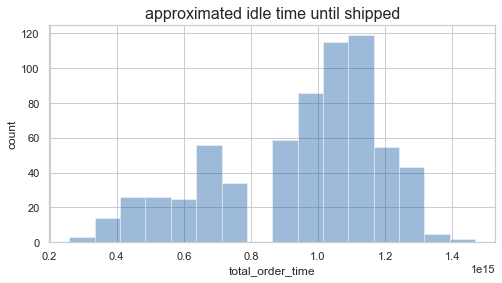

In [136]:
#total time passed from order to shipment arriving at customer
plt.figure(figsize=(8,4))
sns.distplot(arrival['total_order_time'], kde=False,  hist=True)
plt.title('total order time', size=16)
plt.ylabel('count');

In [ ]:
arrival.info()


In [150]:
arrival['total_order_time'] = pd.to_datetime(arrival['total_order_time'], format='%d.%m.%Y')

TypeError: dtype timedelta64[ns] cannot be converted to datetime64[ns]

In [153]:
with pd.ExcelWriter("data/arrival2.xlsx") as writer:
    arrival.to_excel(writer) 